In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
plt.set_loglevel('WARNING')

from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import Ridge
import time
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
car_data = pd.read_csv("data/vehicles.csv")

In [5]:
#
# This data set has 18 features and 426K values
#
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
car_data.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [4]:
car_data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [542]:
def checkDF(t_df):
    for c in t_df.columns:
        nan_count = t_df[c].isnull().sum()
        if nan_count >0:
            print(f"||-- Column {c} has {nan_count} NaN")
        if not pd.api.types.is_numeric_dtype(t_df[c]):
            print(f"||-- Column {c} is catagorical")
            print(t_df[c].value_counts())
            print()


In [543]:
checkDF(car_data)

||-- Column region is catagorical
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

||-- Column year has 1205 NaN
||-- Column manufacturer has 17646 NaN
||-- Column manufacturer is catagorical
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            

In [77]:
#
car_df_1 = car_data.query("price < 80000 and price > 1000 and year >2000")

In [70]:
# Drop columns id and VIN, since they do not represent price
# Drop region, same as state
# Model and size are similer, so drop model
#
car_df_2 = car_df_1.drop(columns=['id', 'VIN', 'region', 'model',])
car_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353635 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         353635 non-null  int64  
 1   year          353635 non-null  float64
 2   manufacturer  343092 non-null  object 
 3   condition     218177 non-null  object 
 4   cylinders     205861 non-null  object 
 5   fuel          351370 non-null  object 
 6   odometer      351655 non-null  float64
 7   title_status  347104 non-null  object 
 8   transmission  351923 non-null  object 
 9   drive         246555 non-null  object 
 10  size          95791 non-null   object 
 11  type          281761 non-null  object 
 12  paint_color   252505 non-null  object 
 13  state         353635 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 40.5+ MB


In [78]:
def replaceNan(a_df, col, val):
    a_df[col].fillna(val, inplace = True) 
    
replaceNan(car_df_2, "manufacturer", "a_company")
#replaceNan(car_df_2, "model", "a_model")
replaceNan(car_df_2, "condition", "good") 
replaceNan(car_df_2, "cylinders", "4 cylinders") 
replaceNan(car_df_2, "size", "mid-size")
replaceNan(car_df_2, "odometer", 10.0) 
replaceNan(car_df_2, "fuel", "gas")
replaceNan(car_df_2, "title_status", "missing")
replaceNan(car_df_2, "transmission", "other")
replaceNan(car_df_2, "drive", "rwd")
replaceNan(car_df_2, "type", "other")
replaceNan(car_df_2, "paint_color", "a_color")

In [79]:
car_df = car_df_2

In [80]:
#
# Convert year into date_time
car_df['year'] = pd.to_datetime(car_df['year'], format='%Y').dt.year

In [112]:
car_df = car_df_2
car_df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [544]:
checkDF(car_df)

||-- Column manufacturer is catagorical
manufacturer
ford               57864
chevrolet          43804
toyota             29046
honda              18636
nissan             16406
ram                15441
jeep               15289
gmc                14101
bmw                12874
dodge              10837
a_company          10543
mercedes-benz       9173
hyundai             9084
subaru              8593
volkswagen          7907
lexus               7273
kia                 7271
audi                6935
cadillac            5952
acura               5454
chrysler            5304
mazda               4715
buick               4650
infiniti            4368
lincoln             3669
volvo               3041
mitsubishi          2843
mini                2192
rover               1797
jaguar              1685
pontiac             1611
porsche             1031
saturn              1000
alfa-romeo           829
tesla                823
mercury              746
fiat                 700
harley-davidson      1

In [82]:
px.histogram(car_df, x='price')

In [83]:
car_df.head()
    

price  year manufacturer  condition    cylinders fuel  odometer  \
27  33590  2014          gmc       good  8 cylinders  gas   57923.0   
28  22590  2010    chevrolet       good  8 cylinders  gas   71229.0   
29  39590  2020    chevrolet       good  8 cylinders  gas   19160.0   
30  30990  2017       toyota       good  8 cylinders  gas   41124.0   
31  15000  2013         ford  excellent  6 cylinders  gas  128000.0   

   title_status transmission drive       size    type paint_color state  
27        clean        other   rwd   mid-size  pickup       white    al  
28        clean        other   rwd   mid-size  pickup        blue    al  
29        clean        other   rwd   mid-size  pickup         red    al  
30        clean        other   rwd   mid-size  pickup         red    al  
31        clean    automatic   rwd  full-size   truck       black    al

<Axes: >

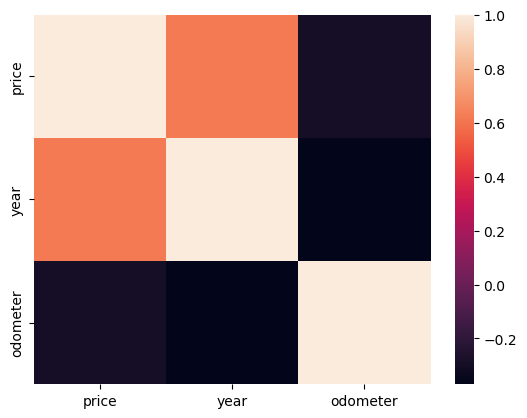

In [84]:
sns.heatmap(car_df[['price','year', 'odometer']].corr())

C:\Users\mdsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\mdsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Price vs Year')

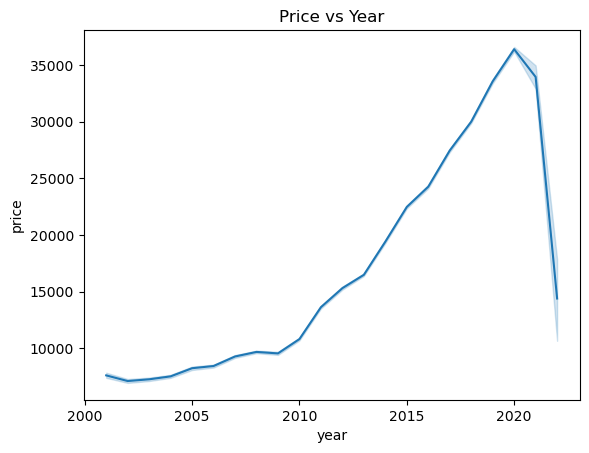

In [545]:
sns.lineplot(data=car_df, x='year', y='price')
plt.title("Price vs Year")

In [86]:
def car_count_plot(col, label, rotation=0, size=(12,6)):
    plt.figure(figsize=size)
    plt.title(f'Count by Car sales {label}', fontsize=20)
    sns.countplot(x=car_df[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

def car_box_plot(col, label):
    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette='tab10')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)

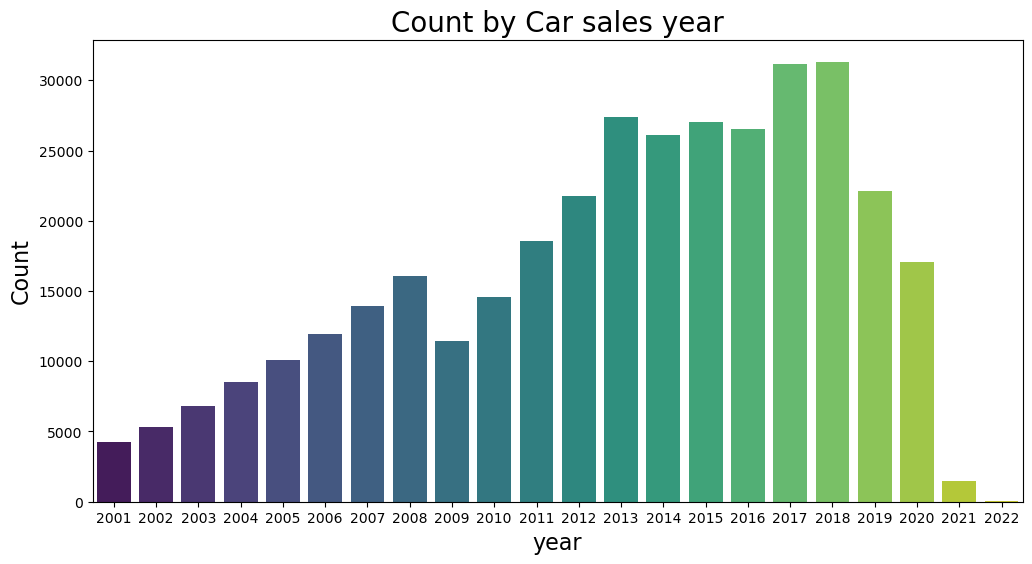

In [546]:
car_count_plot('year','year' )

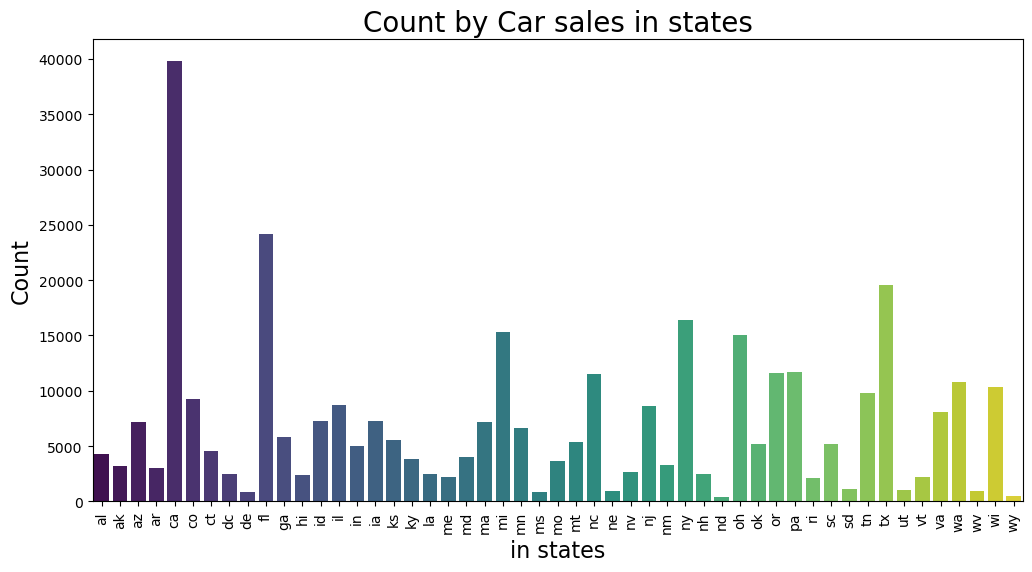

In [547]:
car_count_plot('state','in states', rotation=90 )

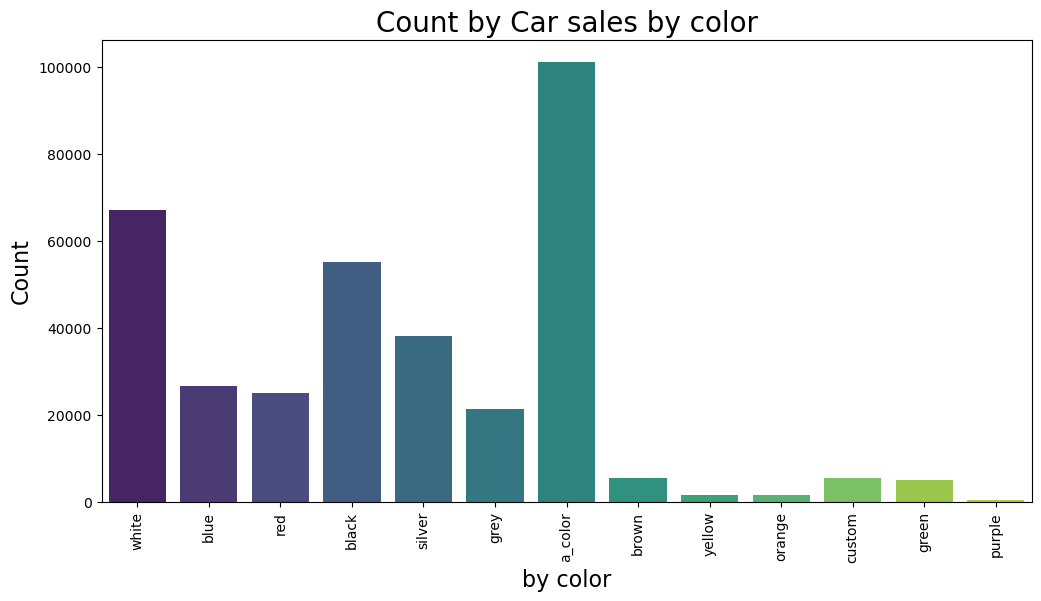

In [548]:
car_count_plot('paint_color','by color', rotation=90 )

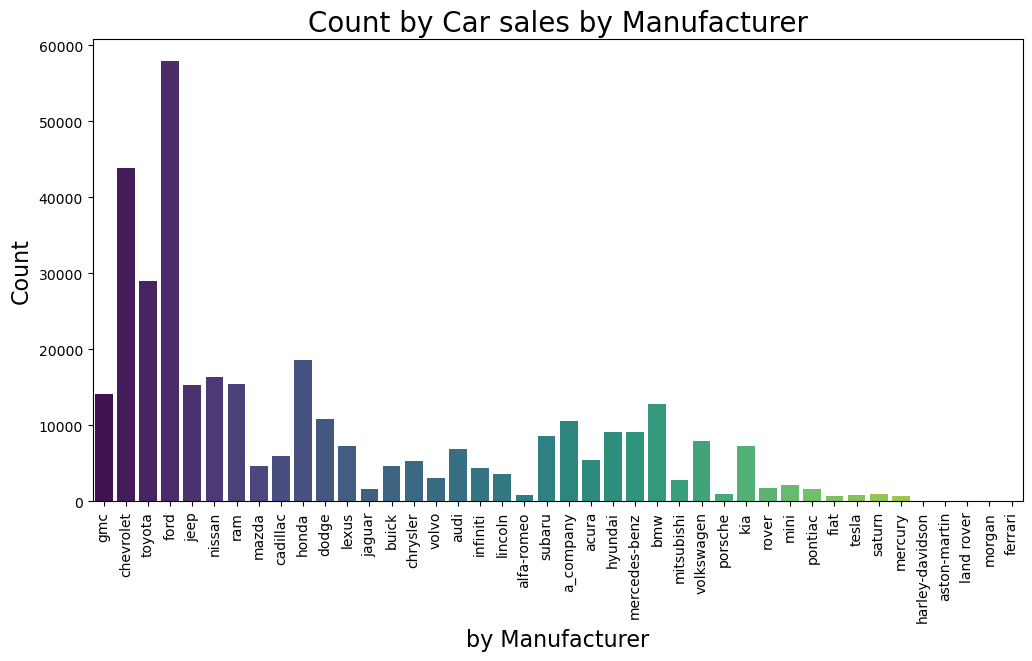

In [549]:
car_count_plot('manufacturer','by Manufacturer', rotation=90 )

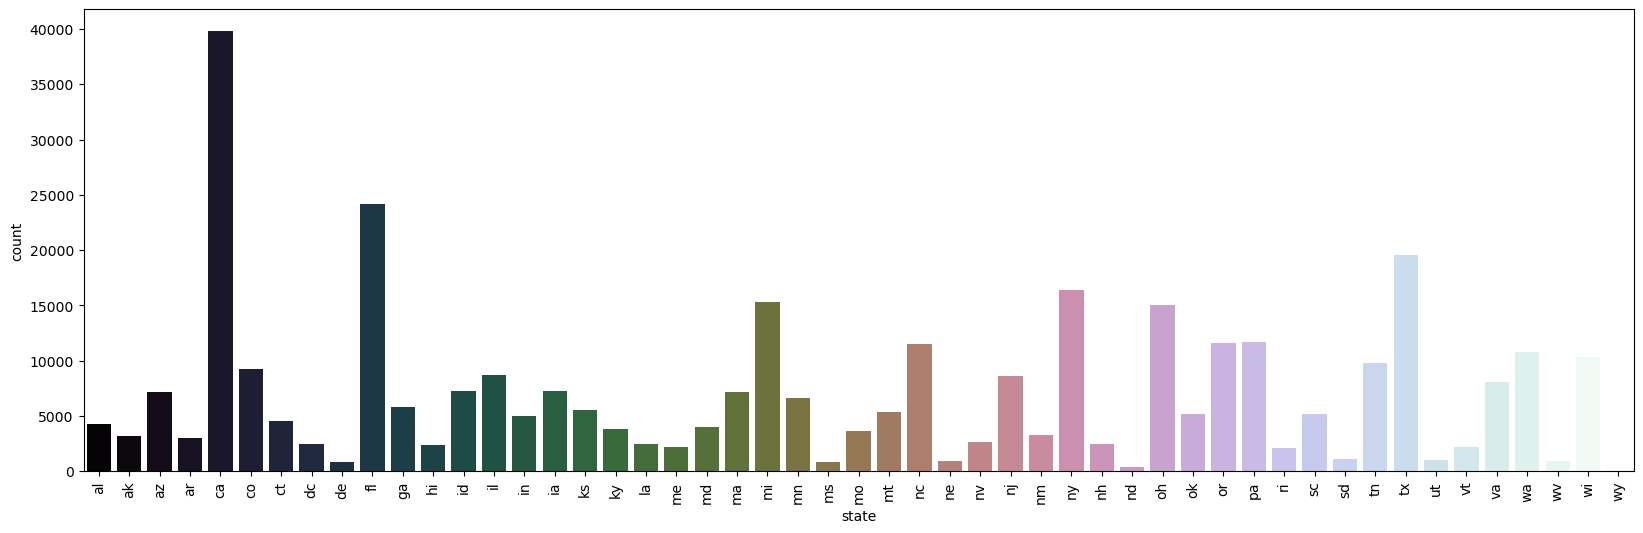

In [300]:
plt.figure(figsize=(20,6))
#sns.barplot(data=car_df, x='state',y='price', palette='cubehelix')
sns.countplot(data=car_df, x='state', palette='cubehelix')
plt.xticks(rotation=90)
plt.set_loglevel('WARNING')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'good'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'fair'),
  Text(3, 0, 'like new'),
  Text(4, 0, 'new'),
  Text(5, 0, 'salvage')])

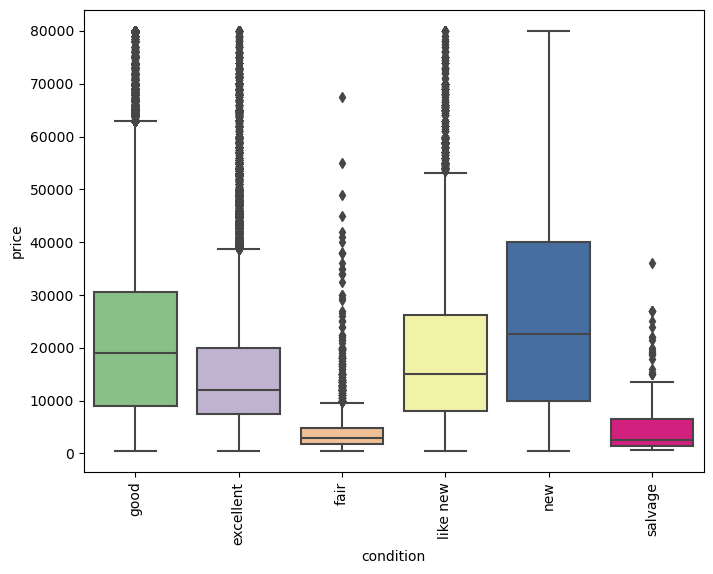

In [321]:
plt.figure(figsize=(8,6))
sns.boxplot(data=car_df, x='condition',y='price', palette='Accent')
plt.xticks(rotation=90)


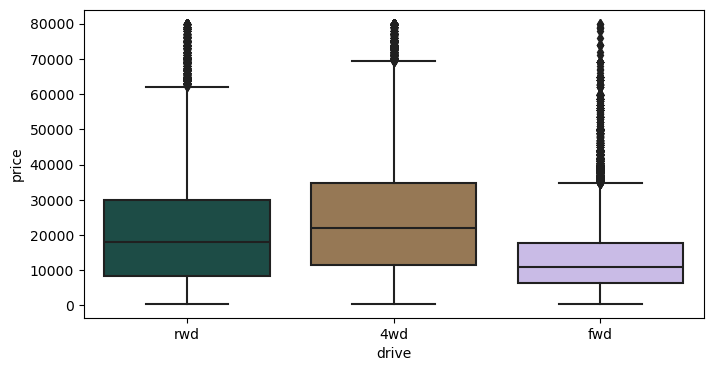

In [268]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_df, x='drive',y='price', palette='cubehelix')
#plt.xticks(rotation=90)
plt.set_loglevel('WARNING')

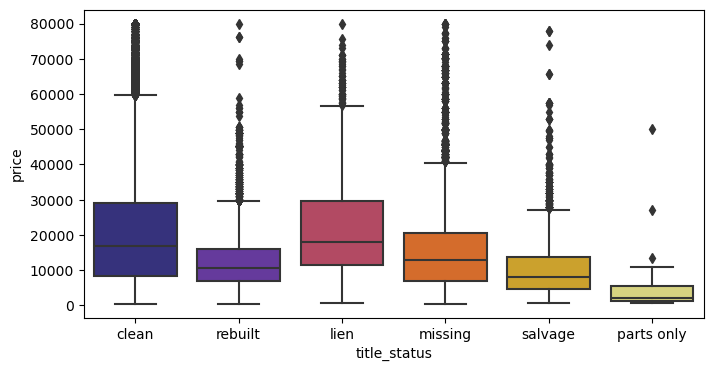

In [323]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_df, x='title_status',y='price', palette='CMRmap')
#plt.xticks(rotation=90)
plt.set_loglevel('WARNING')

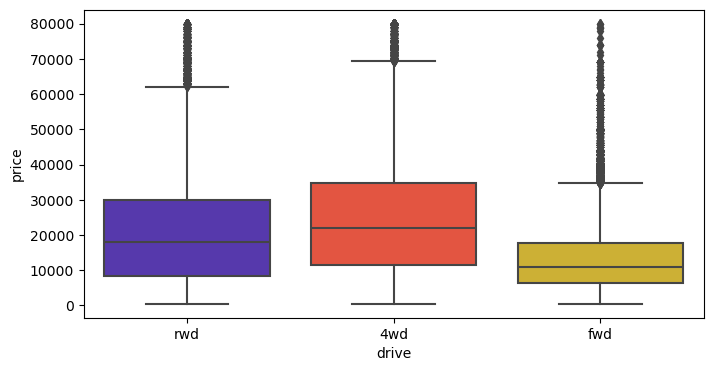

In [326]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_df, x='drive',y='price', palette='CMRmap')
#plt.xticks(rotation=90)
plt.set_loglevel('WARNING')

In [233]:
car_df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [ ]:
# The 'type' has values:
#['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
# 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']

# Type does not provide insight on how it affect the price
# Obviously 'Bus' and 'sedan' does'nt make a comparison
# So drop this column

In [550]:

X = car_df[['year', 'odometer', 'condition', 'fuel', 'cylinders', 'size', 
            'title_status','transmission', 'drive', 'paint_color']]
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [232]:
X_train.shape

(282908, 6)

In [162]:
X_test.shape

(70727, 4)

In [477]:

conditions = ['excellent','new','good', 'fair', 'like new', 'salvage']
fuels      = ['diesel', 'electric', 'gas', 'hybrid', 'other']
cylinders  = ['12 cylinders', '10 cylinders', '8 cylinders','6 cylinders','5 cylinders',
              '4 cylinders', '3 cylinders' ,'other']
size       = ['full-size',  'mid-size', 'compact', 'sub-compact']
title_status = ['clean','rebuilt', 'lien', 'missing', 'parts only', 'salvage']
transmission = ['automatic', 'manual', 'other']
drive        = ['4wd','rwd', 'fwd']

col_trans =  make_column_transformer( 
    (OrdinalEncoder(categories=[conditions]), ['condition']),
    (OrdinalEncoder(categories=[fuels]), ['fuel']),
    (OrdinalEncoder(categories=[cylinders]), ['cylinders']),
    (OrdinalEncoder(categories=[size]), ['size']),
    (OrdinalEncoder(categories=[title_status]), ['title_status']),
    (OrdinalEncoder(categories=[transmission]), ['transmission']),
    (OrdinalEncoder(categories=[drive]), ['drive']),
    (OneHotEncoder(handle_unknown='ignore'),['paint_color']),
    remainder='passthrough')

In [479]:
basic_linear_pipe = Pipeline([('transformer', col_trans), 
                  ('reg', LinearRegression())])


In [203]:
X_train.columns

Index(['year', 'odometer', 'condition', 'fuel', 'cylinders'], dtype='object')

In [480]:
basic_linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'like '
                                                                              'new',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['diesel',
                                                                              'electric',
                                                                              'gas',
                                                                              'hybrid',
                                                                              'other']]),
                                                  ['fuel']),
                                                 ('ordinalencoder-3',
                                                  OrdinalEncoder(cate...
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'missing',
                                                                              'parts '
                                                                              'only',
                                                                              'salvage']]),
                                                  ['title_status']),
                                                 ('ordinalencoder-6',
                                                  OrdinalEncoder(categories=[['automatic',
                                                                              'manual',
                                                                              'other']]),
                                                  ['transmission']),
                                                 ('ordinalencoder-7',
                                                  OrdinalEncoder(categories=[['4wd',
                                                                              'rwd',
                                                                              'fwd']]),
                                                  ['drive']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['paint_color'])])),
                ('reg', LinearRegression())])

In [423]:
def model_report(pipe):
    report = {}
    # 
    # Find Coeffients of each feature
    features = pipe[:-1].get_feature_names_out()
    model = pipe.named_steps['reg']
    coeffs = model.coef_
    print("Coefficients Total ", len(features))
    report['total_coeff'] = len(features)
    for f, c in zip(features, coeffs):
        f = f.split("__")[1]
        print(f"{f:>20} : {c: .2f}")
        report[f] = c
    #
    # Y intercept
    print()
    print(f"Y-intercept : {model.intercept_ : .2f}")
    report['intercept'] = model.intercept_
    #
    # Calculate error
    train_preds = pipe.predict(X_train)
    test_preds  = pipe.predict(X_test)
    train_mse = mean_squared_error(train_preds, y_train)
    test_mse  = mean_squared_error(test_preds, y_test)
    # 
    print("")
    print(f'Train MSE: {train_mse: .2f}')
    print(f'Test  MSE: {test_mse: .2f}')
    report['train_mse'] = train_mse
    report['test_mse'] = test_mse
    return report

In [523]:
basic_linear_report = model_report(basic_linear_pipe)
basic_linear_report['Model'] = 'LinearReg'

Coefficients Total  22
           condition :  627.27
                fuel : -2918.48
           cylinders : -1659.37
                size :  332.27
        title_status : -1610.86
        transmission :  2174.25
               drive : -4645.89
 paint_color_a_color :  429.94
   paint_color_black :  736.32
    paint_color_blue : -693.16
   paint_color_brown : -644.35
  paint_color_custom : -670.31
   paint_color_green : -24.67
    paint_color_grey : -1665.49
  paint_color_orange : -492.21
  paint_color_purple : -1268.99
     paint_color_red :  273.82
  paint_color_silver : -629.52
   paint_color_white :  1407.09
  paint_color_yellow :  3241.51
                year :  1657.03
            odometer : -0.01

Y-intercept : -3300277.32

Train MSE:  88659680.42
Test  MSE:  86261770.88


In [501]:
#
# SequentialFeatureSelector with estimator LinearRegression is used to select the input features
# 
seq_pipe = Pipeline([('transformer', col_trans),
                 ('selector', SequentialFeatureSelector(
                         estimator=LinearRegression(),
                         n_features_to_select='auto',
                         direction="backward",
                         scoring = "neg_mean_squared_error",
                         cv = 3
                 )),
                  ('reg', LinearRegression())])


In [502]:
t0 = time.time()
best = seq_pipe.fit(X_train, y_train)
print("Time taken ", time.time()-t0)

Time taken  113.18561458587646


In [528]:
seq_report = model_report(seq_pipe)
seq_report['Model'] = 'Seq_Linear'

Coefficients Total  11
           condition :  641.64
                fuel : -2913.93
           cylinders : -1628.08
        title_status : -1611.64
        transmission :  2254.80
               drive : -4639.43
 paint_color_a_color :  1031.33
   paint_color_black :  1303.68
   paint_color_white :  1963.35
                year :  1653.96
            odometer : -0.01

Y-intercept : -3294564.98

Train MSE:  88870536.32
Test  MSE:  86428473.08


In [506]:
lasso_pipe = Pipeline([
                 ('transformer', col_trans),
                 ('selector', SelectFromModel(estimator=Lasso())),
                 ('reg', LinearRegression())
            ])

In [507]:
lasso_best = lasso_pipe.fit(X_train, y_train)

In [529]:
lasso_report = model_report(lasso_pipe)
lasso_report['Model'] = 'Lasso_Linear'

Coefficients Total  21
           condition :  627.27
                fuel : -2918.48
           cylinders : -1659.37
                size :  332.27
        title_status : -1610.86
        transmission :  2174.25
               drive : -4645.89
 paint_color_a_color :  922.14
   paint_color_black :  1228.53
    paint_color_blue : -200.95
   paint_color_brown : -152.14
  paint_color_custom : -178.11
   paint_color_green :  467.54
    paint_color_grey : -1173.28
  paint_color_purple : -776.78
     paint_color_red :  766.03
  paint_color_silver : -137.32
   paint_color_white :  1899.30
  paint_color_yellow :  3733.71
                year :  1657.03
            odometer : -0.01

Y-intercept : -3300769.53

Train MSE:  88659680.42
Test  MSE:  86261770.88


C:\Users\mdsha\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.29421e-17): result may not be accurate.



In [509]:
ridge_pipe = Pipeline([
    ('transformer', col_trans), 
    ('selector', SelectFromModel(estimator=Lasso())),
    ("reg", Ridge())
])


In [510]:
ridge_best = ridge_pipe.fit(X_train, y_train)

In [530]:
ridge_report = model_report(ridge_pipe)
ridge_report['Model']='Lasso_Ridge'

Coefficients Total  21
           condition :  627.27
                fuel : -2918.47
           cylinders : -1659.38
                size :  332.26
        title_status : -1610.85
        transmission :  2174.23
               drive : -4645.85
 paint_color_a_color :  916.93
   paint_color_black :  1223.30
    paint_color_blue : -206.15
   paint_color_brown : -157.31
  paint_color_custom : -183.28
   paint_color_green :  462.22
    paint_color_grey : -1178.43
  paint_color_purple : -780.05
     paint_color_red :  760.79
  paint_color_silver : -142.52
   paint_color_white :  1894.06
  paint_color_yellow :  3725.40
                year :  1657.03
            odometer : -0.01

Y-intercept : -3300763.25

Train MSE:  88659680.59
Test  MSE:  86261789.74


In [465]:
ridge_param_dict = {"reg__alpha" : [0.1, 1.0, 10.0, 100]}
ridge_grid = GridSearchCV(estimator=ridge_pipe, param_grid= ridge_param_dict, cv=5, n_jobs=1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['excellent',
                                                                                                     'new',
                                                                                                     'good',
                                                                                                     'fair',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'salvage']]),
                                                                         ['condition']),
                                                                        ('ordinalencoder-2',
                                                                         OrdinalEncoder(categories=[['diesel',
                                                                                                     'electric',
                                                                                                     'gas',
                                                                                                     'hybrid',
                                                                                                     'other']]),
                                                                         ['fuel']),
                                                                        ('ordinalen...
                                                                         OrdinalEncoder(categories=[['automatic',
                                                                                                     'manual',
                                                                                                     'other']]),
                                                                         ['transmission']),
                                                                        ('ordinalencoder-7',
                                                                         OrdinalEncoder(categories=[['4wd',
                                                                                                     'rwd',
                                                                                                     'fwd']]),
                                                                         ['drive']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['paint_color'])])),
                                       ('selector',
                                        SelectFromModel(estimator=Lasso())),
                                       ('reg', Ridge())]),
             n_jobs=1, param_grid={'reg__alpha': [0.1, 1.0, 10.0, 100]})

In [532]:
grid_pipe = ridge_grid.best_estimator_
gridcv_report = model_report(grid_pipe)
gridcv_report['Model'] = 'Ridge_Grid'

Coefficients Total  21
           condition :  627.27
                fuel : -2918.48
           cylinders : -1659.37
                size :  332.27
        title_status : -1610.86
        transmission :  2174.25
               drive : -4645.88
 paint_color_a_color :  921.62
   paint_color_black :  1228.00
    paint_color_blue : -201.48
   paint_color_brown : -152.66
  paint_color_custom : -178.63
   paint_color_green :  467.00
    paint_color_grey : -1173.80
  paint_color_purple : -777.11
     paint_color_red :  765.50
  paint_color_silver : -137.84
   paint_color_white :  1898.77
  paint_color_yellow :  3732.88
                year :  1657.03
            odometer : -0.01

Y-intercept : -3300768.89

Train MSE:  88659680.42
Test  MSE:  86261772.77


In [476]:
ridge_grid.best_params_['reg__alpha']

0.1

In [534]:
#
# Final report
#
reports = [basic_linear_report, seq_report, lasso_report, ridge_report, gridcv_report]
def print_row(item):
    out = f"{item:<20}"
    for r in reports:
        val = r.get(item)
        if val :
            if isinstance(val, str):
                out = out + f"{val:>15}"
            else:
                out = out + f"{r[item]:15.2f}"
        else:
            out = out + f"{'':<15}"
    print(out)

#print("Model     LinearReg  SequentialLinear    LassoLinear   LassoRidge  GridRidge")
print_row('Model')
print_row('total_coeff')
print()
print_row('condition')
print_row('fuel')
print_row('cylinders')
print_row('size')
print_row('title_status')
print_row('transmission')
print_row('drive')
print_row('paint_color_a_color')
print_row('paint_color_black')
print_row('paint_color_blue')
print_row('paint_color_brown')
print_row('paint_color_custom')
print_row('paint_color_green')
print_row('paint_color_grey')
print_row('paint_color_orange')
print_row('paint_color_purple')
print_row('paint_color_red')
print_row('paint_color_silver')
print_row('paint_color_white')
print_row('paint_color_yellow')
print_row('year')
print_row('odometer')
print()
print_row('intercept')
print()
print_row('train_mse')
print_row('test_mse')


Model                     LinearReg     Seq_Linear   Lasso_Linear    Lasso_Ridge     Ridge_Grid
total_coeff                   22.00          11.00          21.00          21.00          21.00

condition                    627.27         641.64         627.27         627.27         627.27
fuel                       -2918.48       -2913.93       -2918.48       -2918.47       -2918.48
cylinders                  -1659.37       -1628.08       -1659.37       -1659.38       -1659.37
size                         332.27                        332.27         332.26         332.27
title_status               -1610.86       -1611.64       -1610.86       -1610.85       -1610.86
transmission                2174.25        2254.80        2174.25        2174.23        2174.25
drive                      -4645.89       -4639.43       -4645.89       -4645.85       -4645.88
paint_color_a_color          429.94        1031.33         922.14         916.93         921.62
paint_color_black            736.32    

In [535]:
#
# Prediction Visualizations
## Uncomment to visualize solutions
#Xnp = X.to_numpy()
#plt.scatter(Xnp, y, label = 'data')
#plt.plot(Xnp, ridge_low_preds, '--r', label = 'ridge predictions')
#plt.plot(Xnp, ols_preds, '--g', label = 'OLS predictions')
#plt.legend();
